# Manually Programming a Neural Network - Practice

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

## Functions and Classes

In [2]:
class Operation():
    """
    An Operation is a node in a "Graph". TensorFlow will also use this concept of a Graph.
    
    This Operation class will be inherited by other classes that actually compute the specific
    operation, such as adding or matrix multiplication.
    """
    
    def __init__(self, input_nodes = []):
        """
        Intialize an Operation
        """
        self.input_nodes = input_nodes # The list of input nodes
        self.output_nodes = [] # List of nodes consuming this node's output
        
        # For every node in the input, we append this operation (self) to the list of
        # the consumers of the input nodes
        for node in input_nodes:
            node.output_nodes.append(self)
        
        # There will be a global default graph (TensorFlow works this way)
        # We will then append this particular operation
        # Append this operation to the list of operations in the currently active default graph
        _default_graph.operations.append(self)
  
    def compute(self):
        """ 
        This is a placeholder function. It will be overwritten by the actual specific operation
        that inherits from this class.
        
        """
        
        pass

In [3]:
class add(Operation):
    
    def __init__(self, x, y):
         
        super().__init__([x, y])

    def compute(self, x_var, y_var):
         
        self.inputs = [x_var, y_var]
        return x_var + y_var

In [4]:
class multiply(Operation):
     
    def __init__(self, a, b):
        
        super().__init__([a, b])
    
    def compute(self, a_var, b_var):
         
        self.inputs = [a_var, b_var]
        return a_var * b_var

In [5]:
class matmul(Operation):
     
    def __init__(self, a, b):
        
        super().__init__([a, b])
    
    def compute(self, a_mat, b_mat):
         
        self.inputs = [a_mat, b_mat]
        return a_mat.dot(b_mat)

In [6]:
class Placeholder():
    """
    A placeholder is a node that needs to be provided a value for computing the output in the Graph.
    """
    
    def __init__(self):
        
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

In [7]:
class Variable():
    """
    This variable is a changeable parameter of the Graph.
    """
    
    def __init__(self, initial_value = None):
        
        self.value = initial_value
        self.output_nodes = []
        
         
        _default_graph.variables.append(self)

In [8]:
class Graph():
    
    
    def __init__(self):
        
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        """
        Sets this Graph instance as the Global Default Graph
        """
        global _default_graph
        _default_graph = self

In [9]:
def traverse_postorder(operation):
    """ 
    PostOrder Traversal of Nodes. Basically makes sure computations are done in 
    the correct order (Ax first , then Ax + b). Feel free to copy and paste this code.
    It is not super important for understanding the basic fundamentals of deep learning.
    """
    
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)

    recurse(operation)
    return nodes_postorder

In [10]:
class Session:
    
    def run(self, operation, feed_dict = {}):
        """ 
          operation: The operation to compute
          feed_dict: Dictionary mapping placeholders to input values (the data)  
        """
        
        # Puts nodes in correct order
        nodes_postorder = traverse_postorder(operation)
        
        for node in nodes_postorder:

            if type(node) == Placeholder:
                
                node.output = feed_dict[node]
                
            elif type(node) == Variable:
                
                node.output = node.value
                
            else: # Operation
                
                node.inputs = [input_node.output for input_node in node.input_nodes]

                 
                node.output = node.compute(*node.inputs)
                
            # Convert lists to numpy arrays
            if type(node.output) == list:
                node.output = np.array(node.output)
        
        # Return the requested node value
        return operation.output

In [11]:
class Sigmoid(Operation):
 
    
    def __init__(self, z):

        # a is the input node
        super().__init__([z])

    def compute(self, z_val):
        
        return 1/(1+np.exp(-z_val))

## Basic Graph

A = 10

b = 1

z = 10x + 1

In [12]:
g = Graph()

In [13]:
g.set_as_default()

In [14]:
A = Variable(10)

In [15]:
b = Variable(1)

In [16]:
x = Placeholder()

In [17]:
y = multiply(A, x)

In [18]:
z = add(y, b)

## Session

In [19]:
sess = Session()

In [20]:
result = sess.run(operation=z, feed_dict={x:10})

In [21]:
result

101

In [22]:
g = Graph()

g.set_as_default()

A = Variable([[10,20],[30,40]])
b = Variable([1,1])

x = Placeholder()

y = matmul(A,x)

z = add(y,b)

In [23]:
sess = Session()

In [24]:
result = sess.run(operation=z, feed_dict={x:10})

In [25]:
result

array([[101, 201],
       [301, 401]])

## Activation Function

In [26]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [27]:
sample_z = np.linspace(-10,10,100)
sample_a = sigmoid(sample_z)

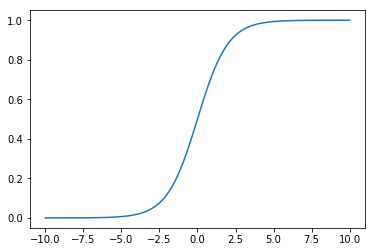

In [28]:
plt.plot(sample_z,sample_a)

## Classification Example

In [29]:
data = make_blobs(n_samples = 50, n_features=2, centers=2)

In [30]:
data

(array([[-10.7485476 ,  -3.83429609],
        [ -8.48493412,  -4.92534406],
        [  5.2658107 ,   1.03838629],
        [  7.24123833,   2.83762895],
        [ -8.839167  ,  -3.0709292 ],
        [  7.34315968,  -0.26676549],
        [-10.1959928 ,  -4.17377974],
        [  8.62770983,  -1.44165881],
        [ -8.74201871,  -7.19635319],
        [ -9.36762106,  -2.85643197],
        [  8.72660775,   1.36042994],
        [  7.44222422,   1.10398412],
        [  8.1731781 ,   2.42196762],
        [ -9.18323588,  -5.29989135],
        [-11.65307359,  -6.02418188],
        [  5.77911987,  -0.86617849],
        [ -9.2924167 ,  -4.69280255],
        [ -8.8664131 ,  -4.78180151],
        [ -8.56902906,  -7.11820458],
        [-10.52837774,  -3.90832725],
        [  6.00738301,   0.90006304],
        [  5.86590707,   2.65416789],
        [  4.89136249,   1.94187126],
        [  4.79777496,   0.50198868],
        [ -8.19255876,  -2.17658483],
        [  6.07900591,   1.18341563],
        [ -9

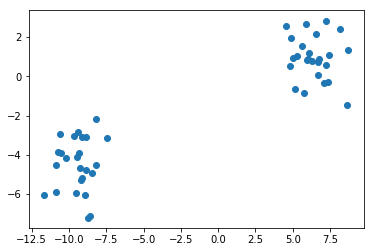

In [31]:
features = data[0]
plt.scatter(features[:,0],features[:,1])

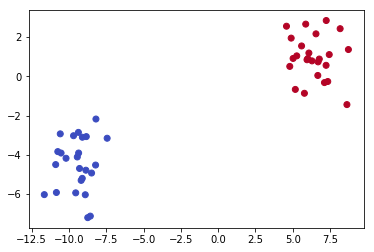

In [32]:
labels = data[1]
plt.scatter(features[:,0],features[:,1],c=labels,cmap='coolwarm')

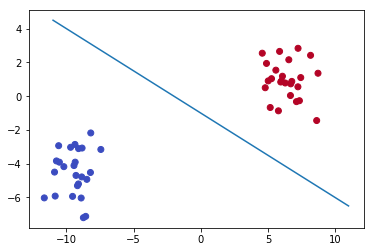

In [38]:
x = np.linspace(-11,11,10)
y = -0.5*x - 1
plt.scatter(features[:,0],features[:,1],c=labels,cmap='coolwarm')
plt.plot(x,y)

### Defining the Perceptron

In [39]:
g = Graph()

In [40]:
g.set_as_default()

In [41]:
x = Placeholder()

In [42]:
w = Variable([1,1])

In [43]:
b = Variable(-5)

In [44]:
z = add(matmul(w,x),b)

In [45]:
a = Sigmoid(z)

In [46]:
sess = Session()

In [47]:
sess.run(operation=a,feed_dict={x:[8,10]})

0.999997739675702

In [48]:
sess.run(operation=a,feed_dict={x:[0,-10]})

3.059022269256247e-07